In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Download the plain text dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR0JWPU/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR0JWPU/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteR0JWPU/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

# Initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [4]:
# Parameters
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [18]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#Model 1: Flatten


In [6]:
# Parameters
embedding_dim = 16
dense_dim = 6

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [7]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE,
                                    epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 5s 9ms/step - loss: 0.6239 - accuracy: 0.6373 - val_loss: 0.4301 - val_accuracy: 0.8114
Epoch 2/10
196/196 [==============================] - 2s 9ms/step - loss: 0.3208 - accuracy: 0.8684 - val_loss: 0.3463 - val_accuracy: 0.8488
Epoch 3/10
196/196 [==============================] - 2s 9ms/step - loss: 0.1978 - accuracy: 0.9308 - val_loss: 0.3550 - val_accuracy: 0.8464
Epoch 4/10
196/196 [==============================] - 2s 9ms/step - loss: 0.1078 - accuracy: 0.9734 - val_loss: 0.4015 - val_accuracy: 0.8369
Epoch 5/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0497 - accuracy: 0.9938 - val_loss: 0.4520 - val_accuracy: 0.8332
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0219 - accuracy: 0.9986 - val_loss: 0.4898 - val_accuracy: 0.8317
Epoch 7/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0115 - accuracy: 0.9995 - val_loss: 0.5315 - val_accuracy: 0.8316
Epoch 

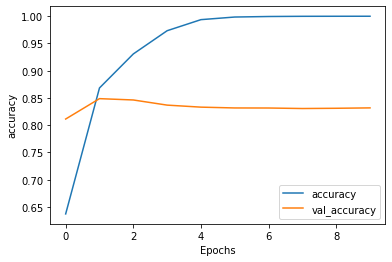

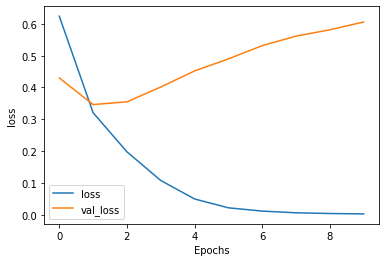

In [8]:
# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

#LSTM

In [9]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [10]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE,
                              epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 18s 66ms/step - loss: 0.5585 - accuracy: 0.6830 - val_loss: 0.3846 - val_accuracy: 0.8340
Epoch 2/10
196/196 [==============================] - 12s 61ms/step - loss: 0.3251 - accuracy: 0.8668 - val_loss: 0.4121 - val_accuracy: 0.8352
Epoch 3/10
196/196 [==============================] - 12s 61ms/step - loss: 0.2569 - accuracy: 0.9012 - val_loss: 0.4045 - val_accuracy: 0.8349
Epoch 4/10
196/196 [==============================] - 12s 61ms/step - loss: 0.2199 - accuracy: 0.9203 - val_loss: 0.4238 - val_accuracy: 0.8368
Epoch 5/10
196/196 [==============================] - 12s 61ms/step - loss: 0.1867 - accuracy: 0.9354 - val_loss: 0.4533 - val_accuracy: 0.8329
Epoch 6/10
196/196 [==============================] - 12s 61ms/step - loss: 0.1573 - accuracy: 0.9462 - val_loss: 0.4738 - val_accuracy: 0.8166
Epoch 7/10
196/196 [==============================] - 12s 61ms/step - loss: 0.1347 - accuracy: 0.9561 - val_loss: 0.5021 - val_accuracy:

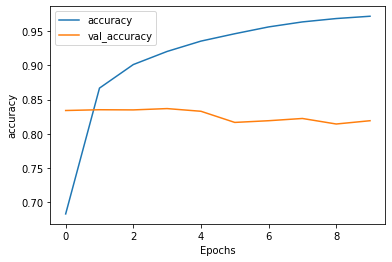

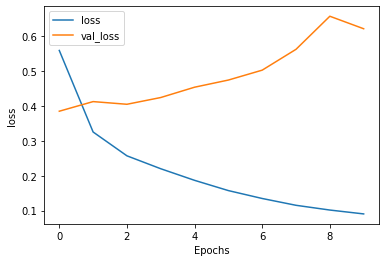

In [11]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

#GRU

In [12]:
import tensorflow as tf

# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [13]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE,
                            epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 16s 66ms/step - loss: 0.5983 - accuracy: 0.6459 - val_loss: 0.3777 - val_accuracy: 0.8333
Epoch 2/10
196/196 [==============================] - 12s 62ms/step - loss: 0.3260 - accuracy: 0.8637 - val_loss: 0.3632 - val_accuracy: 0.8413
Epoch 3/10
196/196 [==============================] - 12s 62ms/step - loss: 0.2401 - accuracy: 0.9074 - val_loss: 0.3509 - val_accuracy: 0.8483
Epoch 4/10
196/196 [==============================] - 12s 61ms/step - loss: 0.1967 - accuracy: 0.9294 - val_loss: 0.4302 - val_accuracy: 0.8368
Epoch 5/10
196/196 [==============================] - 12s 62ms/step - loss: 0.1562 - accuracy: 0.9455 - val_loss: 0.4459 - val_accuracy: 0.8328
Epoch 6/10
196/196 [==============================] - 12s 62ms/step - loss: 0.1229 - accuracy: 0.9594 - val_loss: 0.5329 - val_accuracy: 0.8260
Epoch 7/10
196/196 [==============================] - 12s 62ms/step - loss: 0.0952 - accuracy: 0.9688 - val_loss: 0.5311 - val_accuracy:

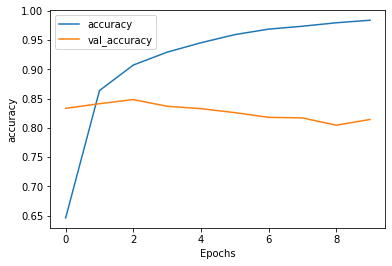

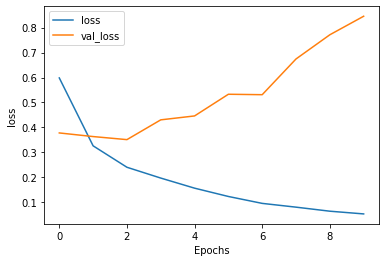

In [14]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

#Convolution

In [15]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

In [16]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE,
                              epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 9s 14ms/step - loss: 0.5151 - accuracy: 0.7461 - val_loss: 0.3713 - val_accuracy: 0.8363
Epoch 2/10
196/196 [==============================] - 2s 12ms/step - loss: 0.2960 - accuracy: 0.8761 - val_loss: 0.3603 - val_accuracy: 0.8425
Epoch 3/10
196/196 [==============================] - 2s 12ms/step - loss: 0.2394 - accuracy: 0.9063 - val_loss: 0.3746 - val_accuracy: 0.8413
Epoch 4/10
196/196 [==============================] - 2s 12ms/step - loss: 0.2032 - accuracy: 0.9232 - val_loss: 0.4145 - val_accuracy: 0.8337
Epoch 5/10
196/196 [==============================] - 3s 16ms/step - loss: 0.1781 - accuracy: 0.9362 - val_loss: 0.4551 - val_accuracy: 0.8276
Epoch 6/10
196/196 [==============================] - 2s 12ms/step - loss: 0.1568 - accuracy: 0.9451 - val_loss: 0.5033 - val_accuracy: 0.8202
Epoch 7/10
196/196 [==============================] - 2s 12ms/step - loss: 0.1412 - accuracy: 0.9513 - val_loss: 0.5408 - val_accuracy: 0.8146

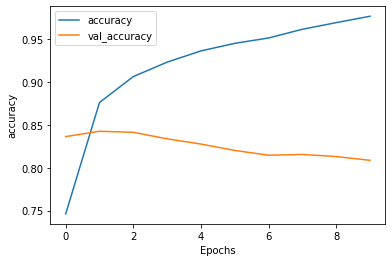

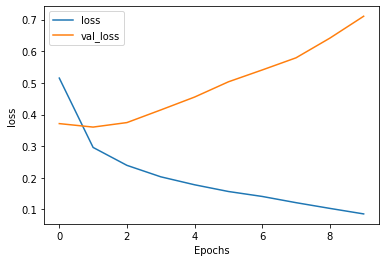

In [17]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')